## 1. Apply LDA on Data 1, Data 2, Data 3 and Data 4.
#### (a) Report sensitivity, specificity, precision and F measure. Plot ROC curve.
#### (b) Plot decision boundaries for all data.
#### (c) Plot multivariate Gaussian density function corresponding to the positive & negative classes and their contours for Data 3.
#### (d) Report the values of the parameters of the final models

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import multivariate_normal
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

DATA1

In [43]:
# FILEPATH: /d:/my books/my books/assign_6/assign_6/assignment_6.ipynb
datafile1 = pd.read_csv('data1.csv', header=None)
datafile1[2] = datafile1[2].replace(-1, 0)
datafile1

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1
...,...,...,...
195,47,17,0
196,24,27,0
197,18,18,0
198,19,7,0


In [44]:
x = dict(datafile1[2].value_counts())
p_1 = x[1]/(x[1]+x[0])
p_0 = x[0]/(x[1]+x[0])


In [45]:
data1 = np.array(datafile1)
np.random.shuffle(data1)
train_data = data1[:int(0.7*len(data1))]

train_data

array([[38, 38,  0],
       [24,  5,  0],
       [ 6, 23,  1],
       [ 4,  4,  0],
       [29, 21,  0],
       [45,  6,  0],
       [50, 20,  0],
       [10, 26,  1],
       [44, 18,  0],
       [ 6, 32,  1],
       [ 6, 42,  1],
       [35,  4,  0],
       [18, 37,  1],
       [23, 46,  1],
       [44,  5,  0],
       [ 9, 18,  1],
       [35, 21,  0],
       [10, 37,  1],
       [38, 15,  0],
       [46,  1,  0],
       [17,  7,  0],
       [ 7, 49,  1],
       [11, 34,  1],
       [32, 47,  1],
       [ 7, 13,  1],
       [29,  2,  0],
       [20, 31,  1],
       [ 8, 49,  1],
       [33, 30,  0],
       [43, 16,  0],
       [39, 27,  0],
       [31, 42,  1],
       [ 8, 42,  1],
       [ 8, 10,  1],
       [37,  7,  0],
       [38,  6,  0],
       [15, 24,  1],
       [16, 46,  1],
       [19, 39,  1],
       [13, 50,  1],
       [ 6, 27,  1],
       [39, 35,  0],
       [ 2, 40,  1],
       [29, 26,  0],
       [32,  2,  0],
       [23, 35,  1],
       [17, 44,  1],
       [17, 4

In [46]:
def calculate_mu(train_data):
    n = len(train_data[0])-1
    mu0 = np.zeros(n)
    mu1 = np.zeros(n)
    for i in range(len(train_data)):
        if train_data[i][-1] == 1:
            mu1 += train_data[i][:-1]
        else:
            mu0 += train_data[i][:-1]

    mu1 = mu1/x[1]
    mu0 = mu0/x[0]
    return mu0, mu1

mu0, mu1 = calculate_mu(train_data)
print(f"mu0 = {mu0}, mu1 = {mu1}")

mu0 = [26.15 12.88], mu1 = [ 9.47 22.27]


In [47]:
def covariance_matrix(train_data):
    n = len(train_data[0])-1
    e1 = np.zeros((n, n))
    e0 = np.zeros((n, n))

    for i in range(len(train_data)):
        if train_data[i][-1] == 1:
            k = train_data[i][:-1] - mu1
            e1 += k.reshape(-1, 1) * k
        else:
            k = train_data[i][:-1] - mu0
            e0 += k.reshape(-1, 1) * k
            
    e1 = e1 / (x[1] - 1)
    e0 = e0 / (x[0] - 1)

    E = (x[1] -1) * e1 + (x[0] -1) * e0
    E = E / (x[1] + x[0] - 2)
    return E, e1, e0

E, e1, e0 = covariance_matrix(train_data)
print(f"weighted covariance matrix = \n{E}")

weighted covariance matrix = 
[[109.41043434  67.83039646]
 [ 67.83039646 167.16443687]]


In [48]:
def claculte_weights(E, mu0, mu1, p_0, p_1):
    w = np.matmul(np.linalg.inv(E), (mu1 - mu0).reshape(-1, 1))
    w0 = -0.5 * np.matmul(np.matmul(mu1, np.linalg.inv(E)), mu1.reshape(-1, 1)) + 0.5 * np.matmul(np.matmul(mu0, np.linalg.inv(E)), mu0.reshape(-1, 1)) + np.log(p_1/p_0)

    w = w.reshape(1, -1)[0]
    return w, w0

w, w0 = claculte_weights(E, mu0, mu1, p_0, p_1)
print(f"w = {w}, \nw0 = {w0}")

w = [-0.25022555  0.15770638], 
w0 = [1.68482744]


In [49]:
test_data = data1[int(0.7*len(data1)):]

def calculate_performance(test_data, w, w0):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(test_data)):
        y = np.inner(w, test_data[i][:-1]) + w0
        if y>=0 and test_data[i][-1]==1:
            TP += 1
        elif y>=0 and test_data[i][-1]==0:
            FP += 1
        elif y<0 and test_data[i][-1]==1:
            FN += 1
        elif y<0 and test_data[i][-1]==0:
            TN += 1

    print(f"TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")

    senitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    F_score = 2*precision*senitivity/(precision+senitivity)

    return senitivity, specificity, precision, F_score

senitivity, specificity, precision, F_score = calculate_performance(test_data, w, w0)
print(f"senitivity = {senitivity}, specificity = {specificity}, \nprecision = {precision}, F_score = {F_score}")


TP = 33, TN = 24, FP = 1, FN = 2
senitivity = 0.9428571428571428, specificity = 0.96, 
precision = 0.9705882352941176, F_score = 0.9565217391304348


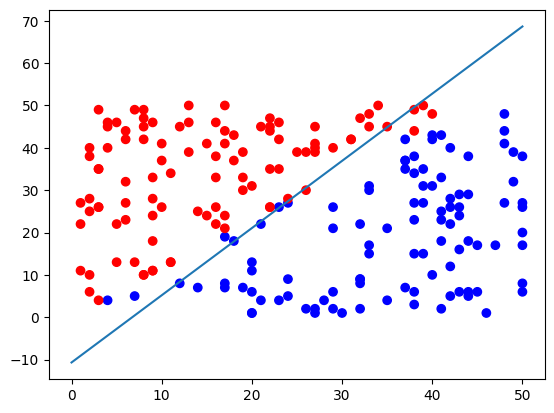

In [50]:
c = ['r' if i[2] == 1 else 'b' for i in data1]
x1 = np.linspace(0, 50, 100)
x2 = -(w[0]*x1 + w0)/w[1]
plt.scatter(data1[:, 0], data1[:, 1], c=c)
plt.plot(x1, x2)
plt.show()


DATA2

In [51]:
datafile2 = pd.read_csv('data2.csv', header=None)
datafile2[3] = datafile2[3].replace(-1, 0)
datafile2

,0,1,2,3
0,69,16,54,1
1,59,18,79,1
2,89,1,81,1
3,84,14,20,1
4,92,48,73,1
...,...,...,...,...
195,48,49,53,0
196,40,93,63,0
197,67,99,40,0
198,60,80,90,0


In [52]:
x = dict(datafile2[3].value_counts())
p_1 = x[1]/(x[1]+x[0])
p_0 = x[0]/(x[1]+x[0])
print(f"p_1 = {p_1}, p_0 = {p_0}")

data2 = np.array(datafile2)
np.random.shuffle(data2)
train_data = data2[:int(0.7*len(data2))]
train_data

p_1 = 0.5, p_0 = 0.5


array([[ 88,  15,  23,   1],
       [ 97,   6,  55,   1],
       [100,   2,  96,   1],
       [ 98,  39,   6,   0],
       [ 35,  12,  32,   1],
       [ 70,  99,  59,   0],
       [ 53,  14,  95,   1],
       [ 93,  48,  76,   1],
       [ 77,  70,  20,   0],
       [ 77,  13,  34,   1],
       [ 74,  22,  18,   1],
       [ 29,  30,  46,   1],
       [ 37, 100,  49,   0],
       [ 24,  67,  10,   0],
       [ 66,  13,  66,   1],
       [ 55,  73,  78,   0],
       [ 34,  30,  81,   1],
       [ 86,  84,  15,   0],
       [ 23,  37,  81,   1],
       [ 60,  80,  90,   0],
       [ 84,  19,  86,   1],
       [ 50,  22,  29,   1],
       [ 98,  82,  10,   0],
       [ 63,  38,  50,   1],
       [ 34,  13,  26,   1],
       [ 97,  15,  22,   1],
       [100,   8,   5,   1],
       [ 25,  32, 100,   1],
       [ 69,  16,  38,   1],
       [ 95,  11,  94,   1],
       [ 73,  16,  50,   1],
       [  7,  28,  20,   0],
       [ 15,  27,  27,   0],
       [ 22,  39,  80,   1],
       [ 74,  

In [53]:
mu0, mu1 = calculate_mu(train_data)
print(f"mu0 = {mu0}, mu1 = {mu1}")
print()

E, e1, e0 = covariance_matrix(train_data)
print(f"weighted covariance matrix = \n{E}")
print()

w, w0 = claculte_weights(E, mu0, mu1, p_0, p_1)
print(f"w = {w}, \nw0 = {w0}")

mu0 = [32.86 47.68 31.47], mu1 = [42.83 16.38 40.62]

weighted covariance matrix = 
[[779.23482323 230.06754545 124.31492929]
 [230.06754545 413.17533333 261.22284848]
 [124.31492929 261.22284848 673.42480303]]

w = [ 0.04398696 -0.13740139  0.0587655 ], 
w0 = [0.61807744]


In [54]:
test_data = data2[int(0.7*len(data2)):]
senitivity, specificity, precision, F_score = calculate_performance(test_data, w, w0)
print(f"senitivity = {senitivity}, specificity = {specificity}, \nprecision = {precision}, F_score = {F_score}")

TP = 30, TN = 30, FP = 0, FN = 0
senitivity = 1.0, specificity = 1.0, 
precision = 1.0, F_score = 1.0


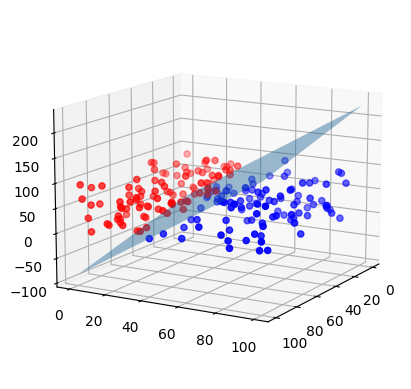

In [55]:
c = ['r' if i[3] == 1 else 'b' for i in np.array(data2)]
x1 = np.linspace(0, 100, 100)
x2 = np.linspace(0, 100, 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0]*x1 + w[1]*x2 + w0)/w[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], c=c)
ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.view_init(13, 30)
plt.show()

DATA3

In [56]:
datafile3 = pd.read_csv('data3.csv', header=None)
datafile3

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1
...,...,...,...
195,8.22200,4.8614,0
196,11.64300,5.3394,0
197,8.16510,10.1410,0
198,14.25700,9.0196,0


In [57]:
x = dict(datafile3[2].value_counts())
p_1 = x[1]/(x[1]+x[0])
p_0 = x[0]/(x[1]+x[0])
print(f"p_1 = {p_1}, p_0 = {p_0}")

data3 = np.array(datafile3)
np.random.shuffle(data3)
train_data = data3[:int(0.7*len(data3))]
train_data

p_1 = 0.5, p_0 = 0.5


array([[ -9.9334  , -10.617   ,   1.      ],
       [ 13.76    ,   7.3335  ,   0.      ],
       [-10.736   , -14.376   ,   1.      ],
       [-10.403   ,  -6.5175  ,   1.      ],
       [  7.4519  ,   2.9273  ,   0.      ],
       [ 11.045   ,   8.1799  ,   0.      ],
       [ 14.466   ,   7.1957  ,   0.      ],
       [ -5.8532  ,  -6.6027  ,   1.      ],
       [  3.7883  ,   4.1962  ,   0.      ],
       [ -7.9981  ,  -8.9182  ,   1.      ],
       [-11.358   , -13.367   ,   1.      ],
       [ -8.2799  , -10.126   ,   1.      ],
       [ -6.0843  ,  -9.2732  ,   1.      ],
       [-10.201   , -11.116   ,   1.      ],
       [ 19.207   ,  17.903   ,   0.      ],
       [  7.6117  ,   7.5053  ,   0.      ],
       [  8.4023  ,   5.7197  ,   0.      ],
       [  6.6092  ,   6.3288  ,   0.      ],
       [ -3.6393  ,  -4.7354  ,   1.      ],
       [ 17.461   ,  13.269   ,   0.      ],
       [-11.293   , -11.421   ,   1.      ],
       [ -5.2105  ,  -8.6979  ,   1.      ],
       [-1

In [58]:
mu0, mu1 = calculate_mu(train_data)
print(f"mu0 = {mu0}, mu1 = {mu1}")
print()

E, e1, e0 = covariance_matrix(train_data)
print(f"weighted covariance matrix = \n{E}")
print()

w, w0 = claculte_weights(E, mu0, mu1, p_0, p_1)
print(f"w = {w}, \nw0 = {w0}")
print()

mu0 = [7.686752   4.98857504], mu1 = [-6.571534 -7.091079]

weighted covariance matrix = 
[[15.90889664 11.30601446]
 [11.30601446 14.40118553]]

w = [-0.67893754 -0.30577875], 
w0 = [0.05713117]



In [59]:
test_data = data3[int(0.7*len(data3)):]
senitivity, specificity, precision, F_score = calculate_performance(test_data, w, w0)
print(f"senitivity = {senitivity}, specificity = {specificity}, \nprecision = {precision}, F_score = {F_score}")


TP = 26, TN = 34, FP = 0, FN = 0
senitivity = 1.0, specificity = 1.0, 
precision = 1.0, F_score = 1.0


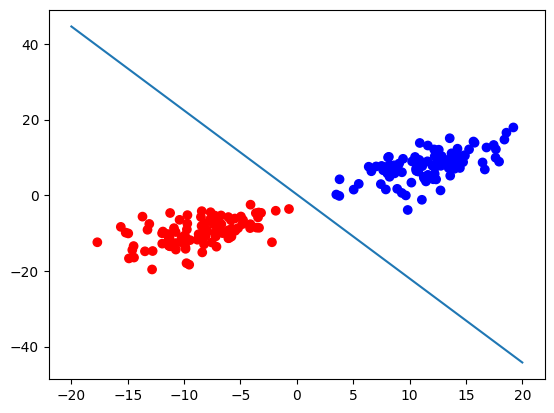

In [60]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile3)]
x1 = np.linspace(-20,20,100)
x2 = -(w0+w[0]*x1)/w[1]

ax=plt.figure().gca()
ax.scatter(np.array(datafile3[0]) , np.array(datafile3[1]),c=c )
ax.plot(x1,x2)
plt.show()

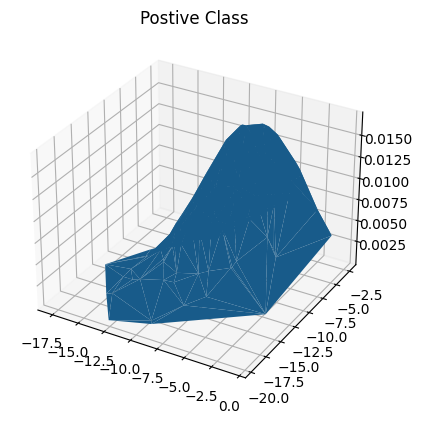

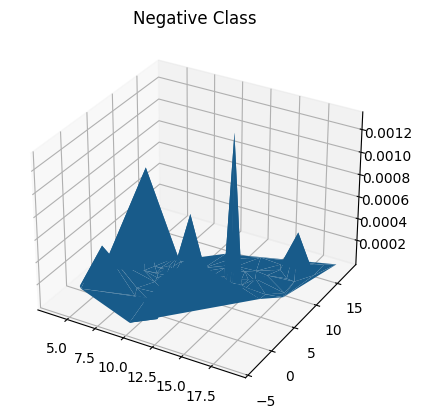

In [61]:
x = [i[:-1] for i in data3 if i[-1] == 1 ]
y = [i[:-1] for i in data3 if i[-1] == 0 ]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,mu1,e1)
ax.plot_trisurf(X1,X2,X3)
ax.set_title("Postive Class")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,mu0,e0)
ax.plot_trisurf(Y1,Y2,Y3)
ax.set_title("Negative Class")

plt.show()

DATA4

In [62]:
datafile4 = pd.read_csv('data4.csv', header=None)
datafile4

,0,1,2
0,12,26,1
1,13,30,1
2,14,31,1
3,14,32,1
4,15,18,1
...,...,...,...
145,12,9,0
146,12,10,0
147,12,16,0
148,13,8,0


In [63]:
x = dict(datafile4[2].value_counts())
p_1 = x[1]/(x[1]+x[0])
p_0 = x[0]/(x[1]+x[0])
print(f"p_1 = {p_1}, p_0 = {p_0}")

data4 = np.array(datafile4)
np.random.shuffle(data4)
train_data = data4[:int(0.7*len(data4))]
train_data


p_1 = 0.5933333333333334, p_0 = 0.4066666666666667


array([[24, 27,  1],
       [ 1,  7,  0],
       [ 9,  9,  0],
       [29, 31,  1],
       [21, 24,  1],
       [21, 30,  1],
       [ 8, 10,  0],
       [12,  6,  0],
       [ 7,  6,  0],
       [25, 33,  1],
       [ 8, 11,  0],
       [20, 21,  1],
       [17, 24,  1],
       [ 8, 12,  0],
       [10, 14,  0],
       [17, 25,  1],
       [14, 31,  1],
       [32, 17,  1],
       [23, 30,  1],
       [29, 22,  1],
       [ 7,  5,  0],
       [17, 21,  1],
       [24, 25,  1],
       [ 4,  7,  0],
       [29, 32,  1],
       [20, 32,  1],
       [12,  9,  0],
       [ 7, 11,  0],
       [17, 28,  1],
       [19, 29,  1],
       [20, 30,  1],
       [ 6, 13,  0],
       [ 3,  7,  0],
       [16, 21,  1],
       [11,  9,  0],
       [18, 25,  1],
       [19, 26,  1],
       [ 9, 12,  0],
       [28, 25,  1],
       [20, 25,  1],
       [12, 16,  0],
       [22, 13,  1],
       [24, 31,  1],
       [22, 20,  1],
       [30, 32,  1],
       [17, 26,  1],
       [ 6, 10,  0],
       [30, 2

In [64]:
mu0, mu1 = calculate_mu(train_data)
print(f"mu0 = {mu0}, mu1 = {mu1}")
print()

E, e1, e0 = covariance_matrix(train_data)
print(f"weighted covariance matrix = \n{E}")
print()

w, w0 = claculte_weights(E, mu0, mu1, p_0, p_1)
print(f"w = {w}, \nw0 = {w0}")


mu0 = [5.44262295 6.7704918 ], mu1 = [14.87640449 17.04494382]

weighted covariance matrix = 
[[35.42446221 26.4030167 ]
 [26.4030167  41.82297957]]

w = [0.15714746 0.1464574 ], 
w0 = [-2.96275271]


In [65]:
test_data = data4[int(0.7*len(data4)):]
senitivity, specificity, precision, F_score = calculate_performance(test_data, w, w0)
print(f"senitivity = {senitivity}, specificity = {specificity}, \nprecision = {precision}, F_score = {F_score}")

TP = 29, TN = 11, FP = 5, FN = 0
senitivity = 1.0, specificity = 0.6875, 
precision = 0.8529411764705882, F_score = 0.9206349206349206


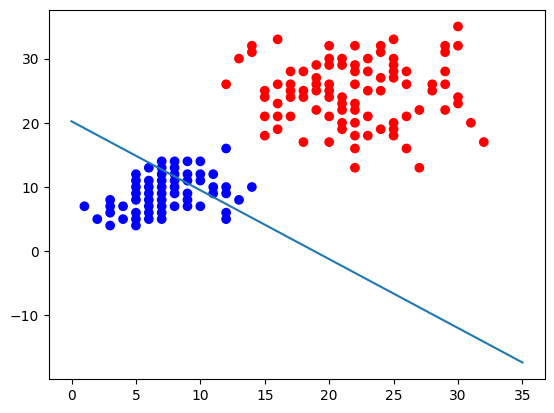

In [66]:
c = ["r" if i[2] == 1 else "b" for i in np.array(datafile4)]
x1 = np.linspace(0,35,100)
x2 = -(w0+w[0]*x1)/w[1]
plt.scatter(np.array(datafile4[0]) , np.array(datafile4[1]),c=c )
plt.plot(x1,x2)
plt.show()

## 3. Apply LDA on Heart Disease data set.
#### (a) Apply k fold and hold out cross validation techniques.
#### (b) Report the preprocessing techniques if any.
#### (c) Report the value of the performance measures used.
#### (d) Compare the performance of the algorithms by using statistical measures

In [67]:
heart_data = pd.read_csv('heart.csv', header=None)
heart_data.rename(columns={13:'y'}, inplace=True)
heart_data.drop(0, inplace=True)
for i in heart_data.columns:
    heart_data[i] = pd.to_numeric(heart_data[i])
heart_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,y
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [68]:
x = dict(heart_data['y'].value_counts())
p_1 = x[1]/(x[1]+x[0])
p_0 = x[0]/(x[1]+x[0])
print(f"p_1 = {p_1}, p_0 = {p_0}")

heart_data = np.array(heart_data)
np.random.shuffle(heart_data)
train_data = heart_data[:int(0.7*len(heart_data))]
train_data

p_1 = 0.5131707317073171, p_0 = 0.4868292682926829


array([[40.,  1.,  0., ...,  0.,  3.,  0.],
       [52.,  0.,  2., ...,  0.,  2.,  1.],
       [57.,  1.,  0., ...,  1.,  1.,  0.],
       ...,
       [66.,  0.,  2., ...,  1.,  2.,  1.],
       [55.,  0.,  1., ...,  0.,  2.,  1.],
       [39.,  0.,  2., ...,  0.,  2.,  1.]])

In [69]:
mu0, mu1 = calculate_mu(train_data)
print(f"mu0 = {mu0}, mu1 = {mu1}")
print()

E, e1, e0 = covariance_matrix(train_data)
print(f"weighted covariance matrix = \n{E}")
print()

w, w0 = claculte_weights(E, mu0, mu1, p_0, p_1)
print(f"w = {w}, \nw0 = {w0}")
print()

mu0 = [4.02945892e+01 5.93186373e-01 3.34669339e-01 9.54629259e+01
 1.80689379e+02 1.24248497e-01 3.16633267e-01 9.97234469e+01
 3.88777555e-01 1.12925852e+00 8.43687375e-01 8.27655311e-01
 1.82164329e+00], mu1 = [3.56653992e+01 3.87832700e-01 9.37262357e-01 8.82053232e+01
 1.62330798e+02 7.79467681e-02 4.22053232e-01 1.09370722e+02
 8.74524715e-02 3.99049430e-01 1.09315589e+00 2.45247148e-01
 1.45437262e+00]

weighted covariance matrix = 
[[ 2.40896265e+02  1.83355919e+00  3.34678576e+00  4.75089711e+02
   8.92299186e+02  7.12432206e-01  1.55773256e+00  4.69926666e+02
   1.12552930e+00  4.58345954e+00  4.33425845e+00  3.79004457e+00
   7.86311894e+00]
 [ 1.83355919e+00  1.66337438e-01  6.39004368e-02  5.00675780e+00
   7.23600207e+00  8.59613306e-03  1.78991920e-02  6.70501612e+00
   2.39559502e-02  4.09649826e-02  7.20867444e-02  3.33169663e-02
   1.20733828e-01]
 [ 3.34678576e+00  6.39004368e-02  6.55989588e-01  9.04499237e+00
   1.33980733e+01  2.62191210e-02  3.48258516e-02  1.168

In [70]:
test_data = heart_data[int(0.7*len(heart_data)):]
senitivity, specificity, precision, F_score = calculate_performance(test_data, w, w0)
print(f"senitivity = {senitivity}, specificity = {specificity}, \nprecision = {precision}, F_score = {F_score}")

TP = 149, TN = 114, FP = 29, FN = 16
senitivity = 0.9030303030303031, specificity = 0.7972027972027972, 
precision = 0.8370786516853933, F_score = 0.8688046647230321


## 4. Apply
#### (a) Multi class LDA on Data 5.
#### (b) Plot the decision boundary between classes.
#### (c) Report the values of the parameters.
#### (d) Assess the performance of the model

In [71]:
datafile5 = pd.read_csv('data5.csv', header=None)
datafile5

,0,1,2,3
0,-6.2213,2.84320,10.54700,1
1,-14.9730,-6.42750,3.83370,1
2,-5.9850,-3.94020,11.98600,1
3,-6.8994,1.87140,11.22500,1
4,-4.8246,4.94470,17.26100,1
...,...,...,...,...
295,1.8102,-0.59976,0.63192,3
296,9.5219,13.22700,13.51400,3
297,-3.8302,-0.51635,-0.49433,3
298,-4.2867,-4.10830,-1.15490,3


In [72]:
x = dict(datafile5[3].value_counts())
pi = {1 : x[1]/(x[1]+x[2]+x[3]) , 2 : x[2]/(x[1]+x[2]+x[3]) , 3 : x[3]/(x[1]+x[2]+x[3])}
print(f"pi = {pi}")

data5 = np.array(datafile5)
np.random.shuffle(data5)
train_data = data5[:int(0.7*len(data5))]
train_data

pi = {1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}


array([[-9.6055e+00, -5.4933e+00,  1.1144e+01,  1.0000e+00],
       [-4.7584e-02,  1.3916e+00,  4.9223e-01,  3.0000e+00],
       [ 5.2434e+00,  8.1891e+00, -6.2864e+00,  2.0000e+00],
       [ 9.5218e+00,  1.2584e+01, -8.7712e+00,  2.0000e+00],
       [-1.4445e+01, -4.0039e+00,  8.8948e+00,  1.0000e+00],
       [ 1.6636e+01,  1.5624e+01, -4.1382e+00,  2.0000e+00],
       [ 7.6283e+00,  1.0035e+01, -4.7690e+00,  2.0000e+00],
       [ 1.8873e+00,  5.8625e+00,  1.7176e+00,  3.0000e+00],
       [ 6.5348e-01,  2.0039e+00,  2.2246e+00,  3.0000e+00],
       [ 6.5335e+00,  9.1965e+00, -7.4714e+00,  2.0000e+00],
       [ 1.4619e+00,  4.2629e+00, -7.2616e-01,  3.0000e+00],
       [ 9.4090e+00,  1.1678e+01, -3.8300e+00,  2.0000e+00],
       [-9.4340e+00, -8.4328e+00,  1.5880e+01,  1.0000e+00],
       [ 8.8513e+00,  1.1263e+01, -6.8528e+00,  2.0000e+00],
       [-1.8340e+00, -6.7627e+00,  3.1352e+00,  3.0000e+00],
       [-5.3568e+00,  3.6479e-01,  5.7321e+00,  1.0000e+00],
       [ 1.0455e+00,  3.

In [73]:
n = len(train_data[0])-1
mu1 = np.zeros(n)
mu2 = np.zeros(n)
mu3 = np.zeros(n)
for i in range(len(train_data)):
    if train_data[i][-1] == 1:
        mu1 += train_data[i][:-1]
    elif train_data[i][-1] == 2:
        mu2 += train_data[i][:-1]
    else:
        mu3 += train_data[i][:-1]

mu1 = mu1/x[1]
mu2 = mu2/x[2]
mu3 = mu3/x[3]

print(f"mu1 = {mu1}, \nmu2 = {mu2}, \nmu3 = {mu3}")

mu1 = [-6.855918  -3.2079258  8.32978  ], 
mu2 = [ 5.0646413  7.735265  -3.5097754], 
mu3 = [-0.33876308 -0.38987011  0.17102624]


In [74]:
e1 = np.zeros((n, n))
e2 = np.zeros((n, n))
e3 = np.zeros((n, n))
for i in range(len(train_data)):
    if train_data[i][-1] == 1:
        k = train_data[i][:-1] - mu1
        e1 += k.reshape(-1, 1) * k
    elif train_data[i][-1] == 2:
        k = train_data[i][:-1] - mu2
        e2 += k.reshape(-1, 1) * k
    else:
        k = train_data[i][:-1] - mu3
        e3 += k.reshape(-1, 1) * k

e1 = e1 / (x[1] - 1)
e2 = e2 / (x[2] - 1)
e3 = e3 / (x[3] - 1)
print(f"e1 = \n{e1}, \ne2 = \n{e2}, \ne3 = \n{e3}")

E = (x[1] -1) * e1 + (x[2] -1) * e2 + (x[3] -1) * e3
E = E / (x[1] + x[2] + x[3] - 3)
print(f"weighted covariance matrix = \n{E}")

e1 = 
[[13.35163583  7.13474233 -4.69536838]
 [ 7.13474233  9.95233141 -2.17172967]
 [-4.69536838 -2.17172967 16.84573099]], 
e2 = 
[[13.001075   12.26313897  0.09528522]
 [12.26313897 20.06411744 -1.81449487]
 [ 0.09528522 -1.81449487  7.76256481]], 
e3 = 
[[10.99592268  7.55768615  5.47864875]
 [ 7.55768615 12.3709124   3.96271647]
 [ 5.47864875  3.96271647  7.03379902]]
weighted covariance matrix = 
[[ 1.24495445e+01  8.98518915e+00  2.92855199e-01]
 [ 8.98518915e+00  1.41291204e+01 -7.83602311e-03]
 [ 2.92855199e-01 -7.83602311e-03  1.05473649e+01]]


In [75]:
A12 = np.matmul((mu1-mu2),np.linalg.inv(E))
b12 =  -np.log(pi[1]/pi[2]) + 0.5*(np.matmul( np.matmul( (mu1+mu2) ,  np.linalg.inv(E) ) , (mu1-mu2).reshape(-1,1)))

A13 = np.matmul((mu1-mu3),np.linalg.inv(E))
b13 =  -np.log(pi[1]/pi[3]) + 0.5*(np.matmul( np.matmul( (mu1+mu3) ,  np.linalg.inv(E) ) , (mu1-mu3).reshape(-1,1)))

A23 = np.matmul((mu2-mu3),np.linalg.inv(E))
b23 =  -np.log(pi[2]/pi[3]) + 0.5*(np.matmul( np.matmul( (mu2+mu3) ,  np.linalg.inv(E) ) , (mu2-mu3).reshape(-1,1)))

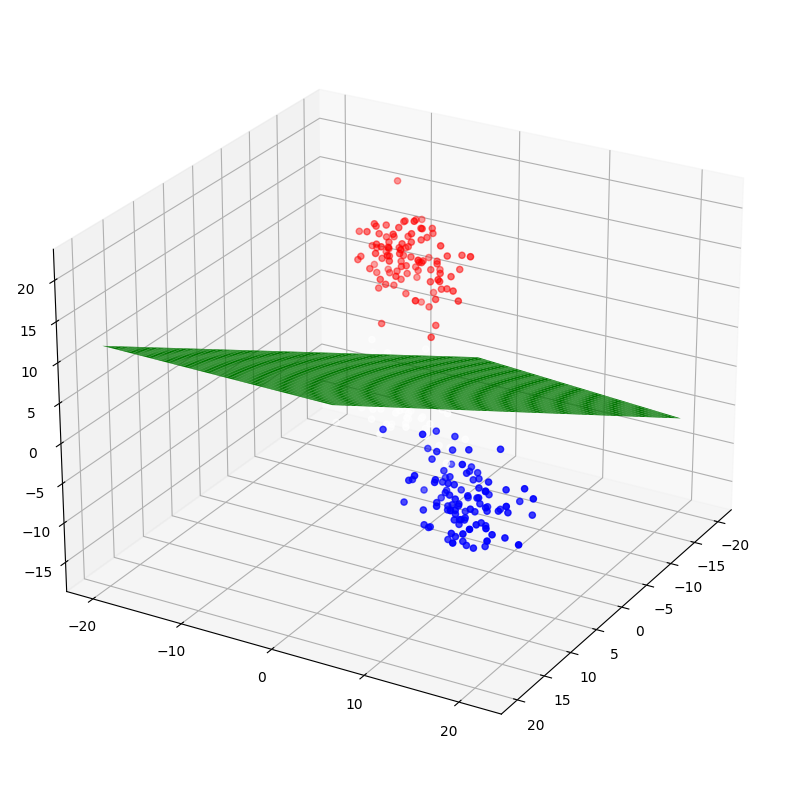

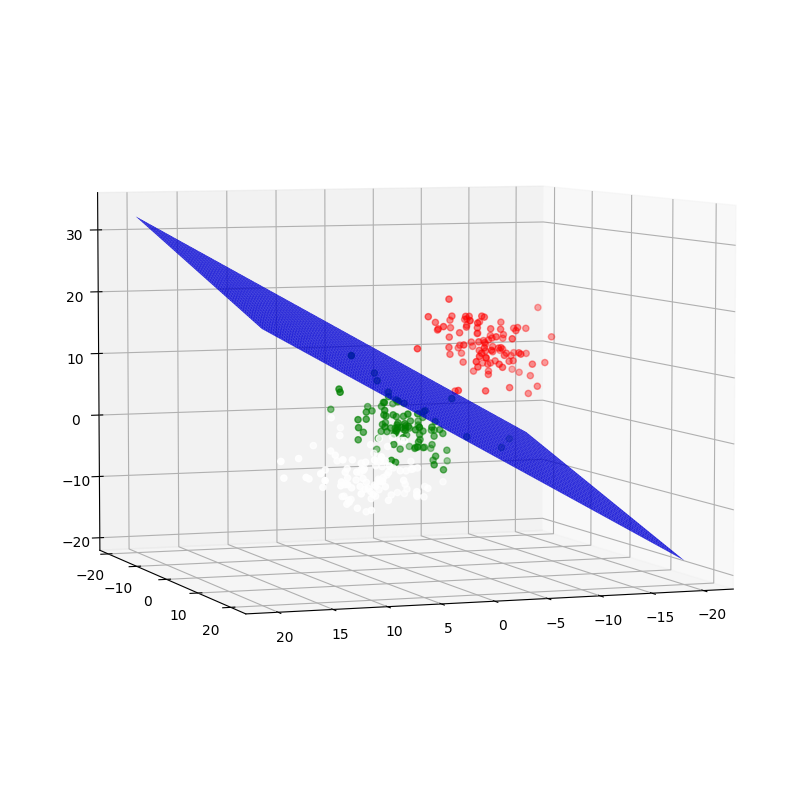

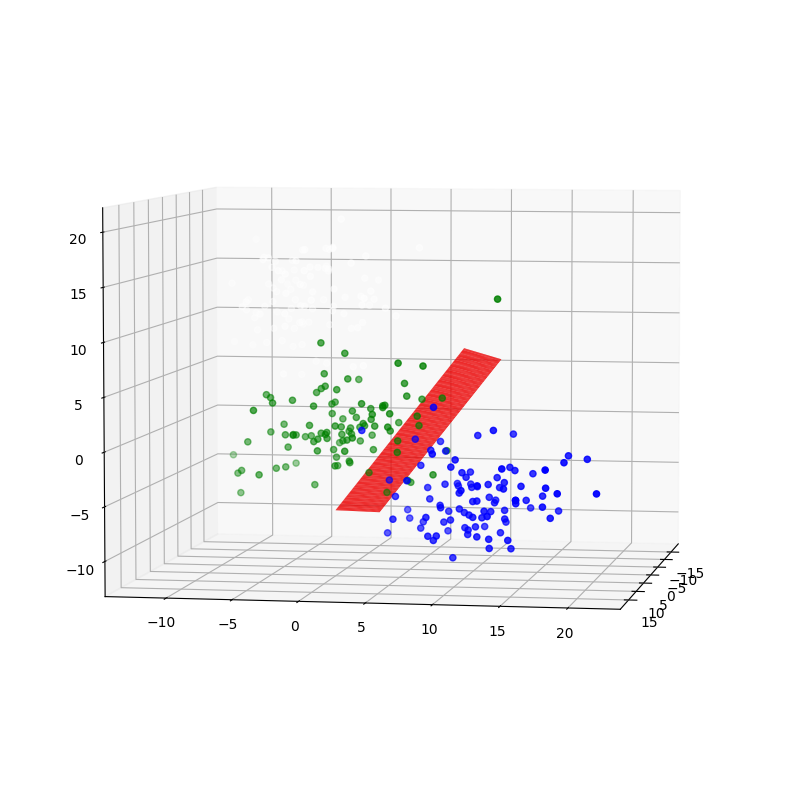

In [76]:
# Desicion boundary between class 1 (red) and class 2(blue)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("r") 
  elif i[3]==2:
    c.append("b")
  else :
    c.append("w")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-20,20,100)
x2 = np.linspace(-20,20,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A12[0]*X1+A12[1]*X2-b12)/(-A12[2])
ax.plot_surface(X1,X2,X3,color="green")
ax.view_init(25,30)
plt.show()

# Desicion boundary between class 1 (red) and class 3(green)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("r") 
  elif i[3]==2:
    c.append("w")
  else :
    c.append("g")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-20,20,100)
x2 = np.linspace(-20,20,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A13[0]*X1+A13[1]*X2-b13)/(-A13[2])
ax.plot_surface(X1,X2,X3,color="blue")
ax.view_init(5, 70)
plt.show()

# Desicion boundary between class 2 (blue) and class 3(green)
c = []
for i in np.array(datafile5):
  if i[3] == 1:
    c.append("w") 
  elif i[3]==2:
    c.append("b")
  else :
    c.append("g")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.array(datafile5[0]) , np.array(datafile5[1]) ,np.array(datafile5[2]),c=c )
x1 = np.linspace(-15, 5, 100)
x2 = np.linspace(0,10,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (A23[0]*X1+A23[1]*X2-b23)/(-A23[2])
ax.plot_surface(X1,X2,X3,color="red")
ax.view_init(5, 10)
plt.show()


## 5. Apply multiclass LDA on Arrhythmia Data Set.
#### (a) Explain the experimental procedure.
#### (b) Report the values of the parameters.
#### (c) Write report on the results obtained

In [77]:
arh_data = pd.read_csv('arrhythmia/arrhythmia.data', header=None)
arh_data

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [78]:
keys = []
for (k,v) in dict((arh_data != 0).any(axis=0)).items():
  if not v:
    keys.append(k)

arh_data = arh_data.drop(columns=keys)

arh_data[279] =arh_data[279].replace(14,11)
arh_data[279] =arh_data[279].replace(15,12)
arh_data[279] =arh_data[279].replace(16,13)

arh_data = arh_data.replace('?', 0)
for i in arh_data.columns:
    arh_data[i] = pd.to_numeric(arh_data[i])

arh_data

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,1


In [79]:
x = dict(arh_data[279].value_counts())
x = dict(sorted(x.items()))

pi = {}
for i in x.keys():
  pi[i] = x[i]/sum(x.values())

print(f"pi = {pi}")

arh_data = np.array(arh_data)
np.random.shuffle(arh_data)
train_data = arh_data[:int(0.7*len(arh_data))]
train_data.shape

pi = {1: 0.5420353982300885, 2: 0.09734513274336283, 3: 0.033185840707964605, 4: 0.033185840707964605, 5: 0.028761061946902654, 6: 0.05530973451327434, 7: 0.00663716814159292, 8: 0.004424778761061947, 9: 0.01991150442477876, 10: 0.11061946902654868, 11: 0.008849557522123894, 12: 0.011061946902654867, 13: 0.048672566371681415}


(316, 263)

In [80]:
n = len(train_data[0])-1
mu = {}

for i in range(1, 14):
  mu[i] = np.zeros(n)
for i in range(len(train_data)):
    mu[train_data[i][-1]] += train_data[i][:-1]
for i in mu.keys():
    mu[i] = mu[i]/x[i]

# print(f"mu = {mu}")
# print()

e = {}
for i in range(1, 14):
   e[i] = np.zeros((n, n))
for i in range(len(train_data)):
  k = train_data[i][:-1] - mu[train_data[i][-1]]
  e[train_data[i][-1]] += k.reshape(-1, 1) * k
for i in e.keys():
  e[i] = e[i] / (x[i] - 1)

# print(f"e = {e}")
# print()

E = np.zeros((n, n))
for i in range(1, 14):
  E += (x[i] -1) * e[i]
E = E / (sum(x.values()) - 13)
print(f"weighted covariance matrix = \n{E}")




weighted covariance matrix = 
[[3.17490477e+02 1.70137278e+00 4.96812741e+02 ... 3.06504356e-01
  5.23236566e+01 4.55975728e+01]
 [1.70137278e+00 1.78202514e-01 4.19502218e+00 ... 7.51047126e-02
  8.46938911e-01 1.40461034e+00]
 [4.96812741e+02 4.19502218e+00 2.29925156e+03 ... 1.29286515e+01
  1.85030184e+02 2.81532329e+02]
 ...
 [3.06504356e-01 7.51047126e-02 1.29286515e+01 ... 1.14012774e+00
  7.35003322e-01 1.27987945e+01]
 [5.23236566e+01 8.46938911e-01 1.85030184e+02 ... 7.35003322e-01
  1.24049007e+02 1.26692145e+02]
 [4.55975728e+01 1.40461034e+00 2.81532329e+02 ... 1.27987945e+01
  1.26692145e+02 2.65119698e+02]]


In [81]:
#check for singularity
det= np.linalg.det(pd.DataFrame(train_data[:, :-1]).cov())
print(f"det_E = {det}")

det_E = 0.0


In [82]:
A = {}
b = {}
for i in range(1, 14):
  for j in range(i+1, 14):
    A[i, j] = np.matmul((mu[i]-mu[j]),np.linalg.inv(E))
    b[i, j] =  -np.log(pi[i]/pi[j]) + 0.5*(np.matmul( np.matmul( (mu[i]+mu[j]) ,  np.linalg.inv(E) ) , (mu[i]-mu[j]).reshape(-1,1)))

LinAlgError: Singular matrix